# <b>Introdução</b>



Trabalho realizado com um conjunto de dados real, a avaliação de diversos filmes por usuários da internet, do MovieLens. O site abriga variações destes dados, que podem ser baixados sob licença de uso. Existem versões de 20 milhões, 100 mil, 27 milhões de notas (ratings) para filmes, e por aí vai.

O arquivo escolhido contém 100 mil. Cada versão disponibilizada pelo site é atualizada periodicamente, então, se baixarmos uma delas hoje, provavelmente dali um tempo o mesmo arquivo terá notas e filmes diferentes. Isso porque trata-se de uma amostra aleatória para análise. 

In [1]:
import pandas as pd

In [2]:
notas = pd.read_csv('dados/ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.shape #índice não conta como uma coluna

(100836, 4)

#### <b> Renomeando colunas </b>

In [4]:
notas.columns = ['usuárioId', 'filmeId', 'nota' , 'momento']
notas.head()

,usuárioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### <b> Exibindo todas as notas únicas </b>
Interessante ressaltar que não há notas 0

In [5]:
notas.nota.unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

#### <b> Analise quantitativa das notas </b>

In [6]:
notas.nota.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

### <b>Média das notas</b>

In [7]:
notas.nota.mean()

3.501556983616962

## <b> 2 - Visualizando dados com histograma e boxplot </b>

#### Plotando diretamente com o pandas
- Muito complicado interpretar esse gráfico.

<AxesSubplot:>

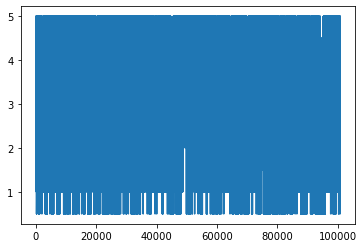

In [8]:
notas.nota.plot()

#### <b> Histograma </b>

O histograma também é conhecido como "distribuição de frequências", e é representado em um gráfico de colunas ou de barras a partir de um conjunto de dados previamente tabulado e dividido em classes (uniformes ou não uniformes).

- Analisando o histograma, perceberemos que a nota 5 apareceu diversas vezes; a nota 4,5 nem tantas; a nota 4 é a que mais apareceu.

<AxesSubplot:ylabel='Frequency'>

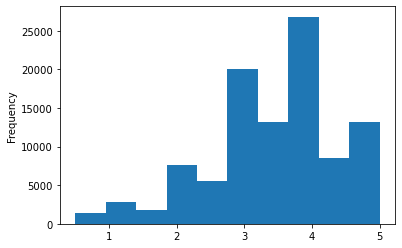

In [9]:
notas.nota.plot(kind= 'hist')

#### <b> Descrevendo os dados </b>

In [10]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

#### <b> Importando a biblioteca seaborn</b>

In [11]:
import seaborn as sns


#### <b> Plotando o 'describe' </b>

- Nessa visualização é possível identificar que metade das pessoas estão atribuindo notas
entre 3 e 4.
- 25 % entre 4 e 5.
- O restante está abaixo de 3.


#### <b> Boxplot </b>
- Já o boxplot, também conhecido como "diagrama de caixa", é um método alternativo para o histograma. Uma de suas particularidades é mostrar a faixa em que está concentrada a média de valores.

c:\Users\marcu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

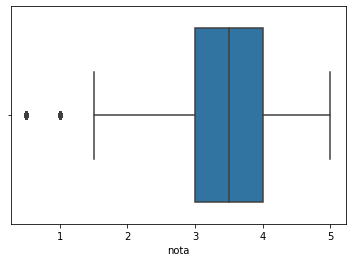

In [12]:
sns.boxplot(notas.nota)

## <b> 3 - Análise exploratória dos dados </b>
#### <b> Carregando arquivo dos filmes </b>

In [13]:
filmes = pd.read_csv('dados/movies.csv')

In [14]:
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#### <b> Renomeando as colunas </b>

In [15]:
filmes.columns = ['filmesId', 'titulo', 'genero']
filmes

,filmesId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


#### <b>Filtrando avaliações do filme id 1 (Query) </b>

In [16]:
notas.query('filmeId == 1')

,usuárioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


#### <b> Extraindo média dos filmes </b>
- Importante salientar que a média do filme Toy Story  está acima da média geral.

In [17]:
notas.query('filmeId == 1').nota.mean()

3.9209302325581397

#### <b>Agrupando os filmes e extraindo a média</b>

In [18]:
medias_por_filme = notas.groupby('filmeId').mean()['nota']

In [19]:
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

#### <b>Analisando as distribuições das médias</b>

<AxesSubplot:ylabel='Frequency'>

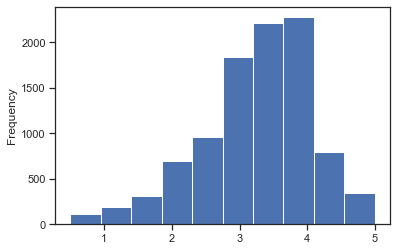

In [273]:
medias_por_filme.plot(kind='hist') #histograma

<AxesSubplot:ylabel='nota'>

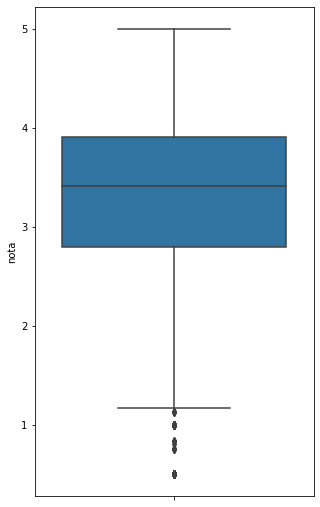

In [ ]:
import matplotlib.pyplot as plt #Importando matplotlib aqui apenas para ilustrar que usa o matplotlib "por trás dos panos"

plt.figure(figsize=(5, 9))
sns.boxplot(y = medias_por_filme)



In [ ]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

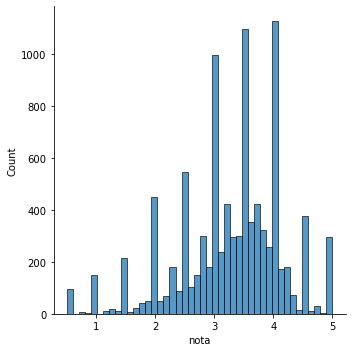

In [ ]:
sns.displot(medias_por_filme)


#### <b>Importando matplotlib</b>

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

Text(0.5, 1.0, 'Média dos filmes')

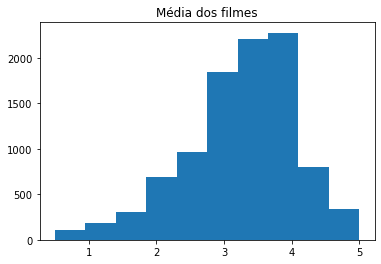

In [ ]:
plt.hist(medias_por_filme)
plt.title("Média dos filmes")


# <b> 4 -  Tipos de variáveis </b>

Dessa vez, para experimentarmos outros tipos de dados, utilizaremos o conjunto TMDB 5000 Movie Dataset, um dataset hospedado no Kaggle, com informações sobre 5000 filmes.

In [23]:
tmdb = pd.read_csv('dados/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


#### <b> Exibindo linguagens </b>
- Começaremos com a língua original desses filmes. Essa é uma variável bem diferente das que utilizamos até agora, já que não se tratam de um número, não existe uma ordem de grandeza entre os valores e eles são únicos entre si — ou seja, trata-se de uma variável categórica. Quando estamos trabalhando com um conjunto em que cada uma dessas categorias recebe um nome, costumamos utilizar o termo variável <b> categórica nominal</b>.

In [25]:
tmdb.original_language.unique() 

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [27]:
tmdb.budget.unique() #quantitativa contínuo

array([237000000, 300000000, 245000000, 250000000, 260000000, 258000000,
       280000000, 270000000, 200000000, 255000000, 225000000, 220000000,
       380000000, 215000000, 180000000, 207000000, 209000000, 150000000,
       210000000, 170000000, 190000000, 195000000, 105000000, 185000000,
       175000000, 140000000, 176000003, 178000000, 145000000,  27000000,
       165000000, 160000000,  15000000,  38000000, 155000000, 149000000,
       144000000,  70000000, 100000000, 139000000, 135000000, 130000000,
       137000000, 120000000, 132000000, 110000000, 125000000, 127500000,
       127000000, 103000000,  65000000, 123000000, 115000000, 117000000,
       113000000,  97250400, 116000000, 112000000,  93000000, 107000000,
               0, 133000000, 108000000, 126000000,  90000000, 102000000,
        80000000,  84000000,  99000000,  10000000,  98000000,  94000000,
        85000000,  92000000,  95000000,  79000000,  75000000,  88000000,
        68000000,  20000000,  87000000,  60000000, 

# <b> 5 - Visualização dos dados</b>

#### <b> Contando aparições das linguagens em série </b>

In [28]:
tmdb['original_language'].value_counts()

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

#### <b> Transformando em DataFrame </b>

In [29]:
tmdb['original_language'].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ru,11


#### <b> Resetando o index, o transformando em coluna </b>

In [32]:
tmdb['original_language'].value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ru,11


In [41]:
contagem_de_lingua =tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language' , 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


#### <b> Visualizando, plotando e comparando </b>

<AxesSubplot:xlabel='original_language', ylabel='total'>

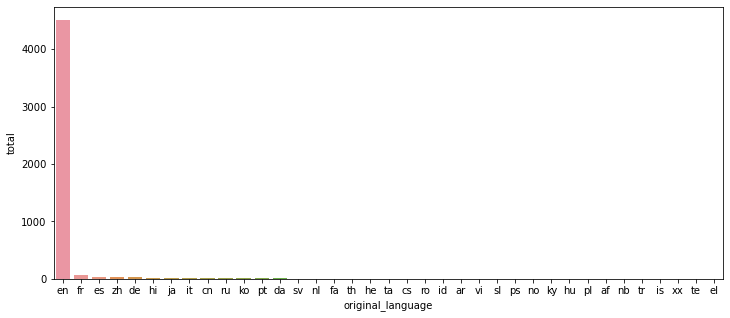

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,5))
sns.barplot(x = "original_language", y = "total",  data = contagem_de_lingua)

#### <b> Plotando diretamente sem realizar operações</b>
Usando apenas o df original, sem nenhum tratamento.

- <b> Importante </b> = Essa função catplot apenas funciona nas versões => 0.9.0 do siborn.
 Para instalar : !pip install seaborn==0.9.0

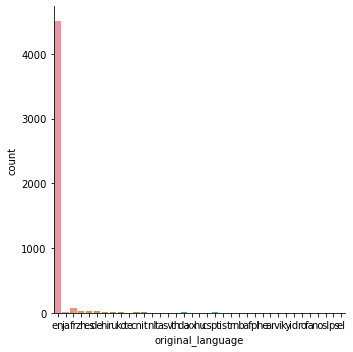

In [49]:
sns.catplot(x = 'original_language', kind = 'count', data = tmdb)

#### <b> Gráfico de pizza </b>

Não é muito recomendado usar esse gráfico, pois fica difícil entender o tamanho das áreas.


([<matplotlib.patches.Wedge at 0x18b8cc739a0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

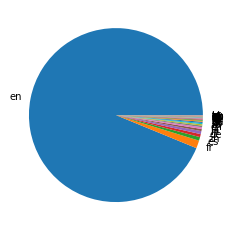

In [51]:
plt.pie(contagem_de_lingua['total'], labels = contagem_de_lingua['original_language'])

#### <b> Separando a linguagem inglês das outras existentes </b>

In [57]:
total_por_lingua = tmdb['original_language'].value_counts()
total_por_lingua

en    4505
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [64]:
total_geral = total_por_lingua.sum()
total_geral

4803

In [71]:
total_de_ingles = total_por_lingua.loc['en']
total_de_ingles

4505

In [65]:
total_do_resto = total_geral - total_de_ingles

In [66]:
total_do_resto

298

#### <b>Criando data frame com a linguagens</b>

In [74]:
dados = {
    'lingua' : ['ingles' , 'outros'],
    'total' : [total_de_ingles, total_do_resto]
}

In [79]:
dados = pd.DataFrame(dados) #reescreve a variável
dados

,lingua,total
0,ingles,4505
1,outros,298


<AxesSubplot:xlabel='lingua', ylabel='total'>

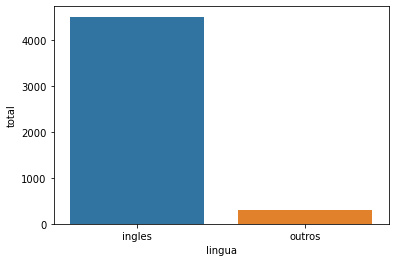

In [83]:
sns.barplot(data = dados, x = 'lingua', y= 'total')

#### <b> Plotando com gráfico de pizza </b>
Agora com menos informações e mais fácil visualização. 

<Figure size 1080x576 with 0 Axes>

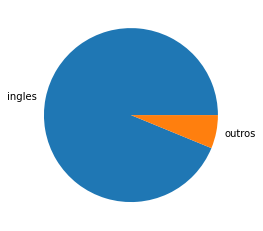

<Figure size 1080x576 with 0 Axes>

In [88]:
plt.pie(dados['total'], labels = dados['lingua'])


#### <b> Fazendo query 'pergunta' para filtrar a linguagem  </b>

In [95]:
tmdb.query("original_language != 'en'")

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
97,15000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,315011,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 7671,...",ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.476999,"[{""name"": ""Cine Bazar"", ""id"": 5896}, {""name"": ...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",2016-07-29,77000000,120.0,"[{""iso_639_1"": ""it"", ""name"": ""Italiano""}, {""is...",Released,A god incarnate. A city doomed.,Shin Godzilla,6.5,143
235,97250400,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 12, ""na...",http://www.asterixauxjeuxolympiques.com/index.php,2395,"[{""id"": 271, ""name"": ""competition""}, {""id"": 12...",fr,Astérix aux Jeux Olympiques,Astérix and Obélix have to win the Olympic Gam...,20.344364,"[{""name"": ""Constantin Film"", ""id"": 47}, {""name...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2008-01-13,132900000,116.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,NaN,Asterix at the Olympic Games,5.0,471
317,94000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 36, ""name...",http://www.theflowersofwarmovie.com/,76758,"[{""id"": 173251, ""name"": ""forced prostitution""}...",zh,金陵十三釵,A Westerner finds refuge with a group of women...,12.516546,"[{""name"": ""Beijing New Picture Film Co. Ltd."",...","[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2011-12-15,95311434,145.0,"[{""iso_639_1"": ""zh"", ""name"": ""\u666e\u901a\u8b...",Released,NaN,The Flowers of War,7.1,187
474,0,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,330770,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 658, ""na...",fr,Évolution,11-year-old Nicolas lives with his mother in a...,3.300061,"[{""name"": ""Ex Nihilo"", ""id"": 3307}, {""name"": ""...","[{""iso_3166_1"": ""BE"", ""name"": ""Belgium""}, {""is...",2015-09-14,0,81.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,NaN,Evolution,6.4,47
492,8000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 16, ""nam...",NaN,293644,"[{""id"": 209714, ""name"": ""3d""}]",es,Don Gato: El inicio de la pandilla,Top Cat has arrived to charm his way into your...,0.719996,"[{""name"": ""Anima Estudios"", ""id"": 9965}, {""nam...","[{""iso_3166_1"": ""IN"", ""name"": ""India""}, {""iso_...",2015-10-30,0,89.0,[],Released,NaN,Top Cat Begins,5.3,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,90414,"[{""id"": 187056, ""name"": ""woman director""}]",fr,"I Love You, Don't Touch Me!","The story of a 25 year old virgin girl, lookin...",0.020839,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-01-21,0,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just Your Typical Boy-Loves-Girl Who Doesn't L...,"I Love You, Don't Touch Me!",6.0,1
4751,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",NaN,42109,[],pt,"Gabriela, Cravo e Canela","In 1925, Gabriela becomes cook, mistress, and ...",0.557602,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""BR"", ""name"": ""Brazil""}]",1983-03-24,0,99.0,"[{""iso_639_1"": ""pt"", ""name"": ""Portugu\u00eas""}]",Released,NaN,Gabriela,6.0,2
4790,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10769, ""n...",NaN,13898,[],fa,دایره,Various women struggle to function in the oppr...,1.193779,"[{""name"": ""Jafar Panahi Film Productions"", ""id...","[{""iso_3166_1"": ""IR"", ""name"": ""Iran""}]",2000-09-08,0,90.0,"[{""iso_639_1"": ""fa"", ""name"": ""\u0641\u0627\u06...",Released,NaN,The Circle,6.6,17
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",NaN,36095,"[{""id"": 233, ""name"": ""japan""}, {""id"": 549, ""na...",ja,キュア,A wave of grueso

#### <b> Analisando o total de outras linguagens por filmes </b>

In [102]:
total_por_lingua_de_outros_filmes = tmdb.query("original_language != 'en'")['original_language'].value_counts()

In [103]:
total_por_lingua_de_outros_filmes

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
fa     4
nl     4
he     3
th     3
ro     2
id     2
ar     2
cs     2
ta     2
tr     1
nb     1
af     1
pl     1
is     1
hu     1
vi     1
ky     1
xx     1
te     1
no     1
sl     1
ps     1
el     1
Name: original_language, dtype: int64

In [106]:
filmes_sem_en = tmdb.query("original_language != 'en'") #filmes em inglês

#### <b> Plotando sem a lingua inglesa </b>

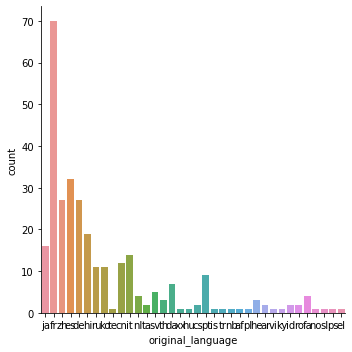

In [109]:
sns.catplot(x= 'original_language', kind = 'count', data = filmes_sem_en)

# <b> 6 - Continuando com visualizações </b>

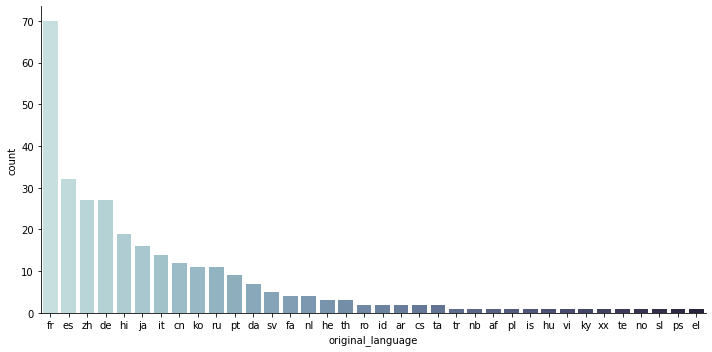

In [144]:
sns.catplot(x= 'original_language', kind = 'count', data = filmes_sem_en, aspect= 2, margin_titles= True, order = total_por_lingua_de_outros_filmes.index,
palette="ch:start=.2,rot=-.3")

# <b> 7 - Dados e estatística </b>

In [149]:
filmes.head(2)

,filmesId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [153]:
notas.head(2)

,usuárioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247


#### <b> Query com o filme 1 e 2 </b>

In [156]:
toy_story_notas = notas.query('filmeId == 1')

In [157]:
jumanji_notas = notas.query('filmeId == 2')

In [159]:
len(toy_story_notas)

215

In [158]:
print(f" Notas do Toy Story {len(toy_story_notas)}, Notas do Jumani {len(jumanji_notas)}")

 Notas do Toy Story 215, Notas do Jumani 110


#### <b> Média das notas </b>

In [165]:
print(f' Nota média Toy Sotry {toy_story_notas.nota.mean():.2f}')

 Nota média Toy Sotry 3.92


In [177]:
print(f'Nota média do filme Jumanji {jumanji_notas.nota.mean():.2f}')

Nota média do filme Jumanji 3.43


In [184]:
#Outra forma de fazer
# print("Nota média do Toy Story %.2f" % toy_story_notas.nota.mean())


#### <b> Mediana </b>

In [187]:
print("Mediana do Toy Story %.2f" % toy_story_notas.nota.median())


Mediana do Toy Story 4.00


In [186]:
print("Mediana do Jumanji %.2f" % jumanji_notas.nota.median())

Mediana do Jumanji 3.50


#### <b> Importando numpy </b>

In [188]:
import numpy as np

In [212]:
filme1= np.array([2.5] * 10), np.array([3.5] * 10))
filme1

(array([2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5]),
 array([3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5]))

In [213]:
filme2 = (np.array([5] * 10), np.array([1] * 10))
filme2


(array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5]), array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

#### <b> Juntando arrays </b>


In [217]:
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))

filme2 = np.append(np.array([5] * 10), np.array([1] * 10))

#### <b> Média e mediana dos arrays </b>

In [226]:
print(filme1.mean(), filme2.mean(),np.median(filme1), np.median(filme2))


3.0 3.0 3.0 3.0


#### <b> Distplot </b>

c:\Users\marcu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\marcu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

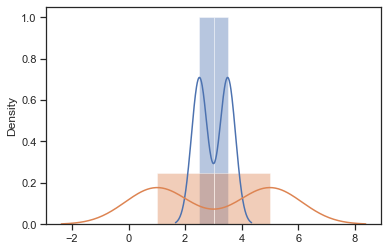

In [229]:
sns.distplot(filme1)
sns.distplot(filme2)

#### <b> Histograma</b>

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

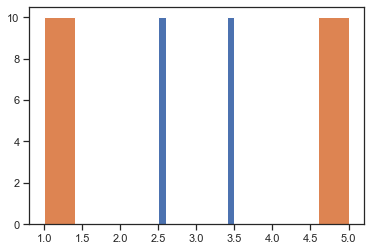

In [232]:
plt.hist(filme1)
plt.hist(filme2)

#### <b> Boxplot</b>

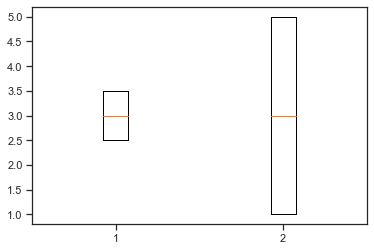

In [243]:
plt.boxplot([filme1, filme2])
plt.show()

c:\Users\marcu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

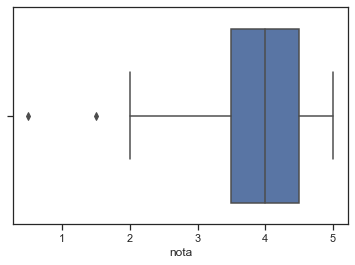

In [245]:
sns.boxplot(toy_story_notas.nota)

c:\Users\marcu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nota'>

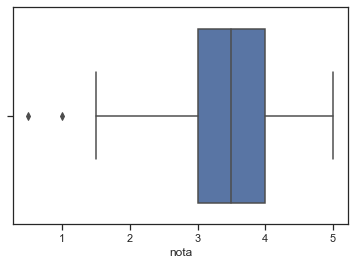

In [246]:
sns.boxplot(jumanji_notas.nota)

- Importante avaliar a disperção desses dados, nota-se que em Toy Story as notas são maiores do que o filme 2.

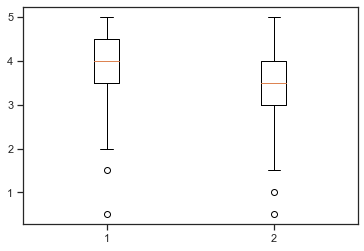

In [249]:
plt.boxplot([toy_story_notas.nota, jumanji_notas.nota])
plt.show()

#### <b> Plotando com o seaborn sem a separação dos dados. </b>

<AxesSubplot:xlabel='filmeId', ylabel='nota'>

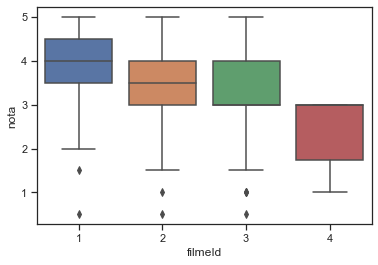

In [257]:
df1 = notas.query('filmeId in [1, 2, 3,  4 ]') #filtrando as notas dos filmes 
sns.boxplot(x = 'filmeId' , y = 'nota', data = df1)

####  <b> Desvio padrão 

In [270]:
toy_story_notas.nota.std()

0.8348591407114045

In [271]:
jumanji_notas.nota.std()

0.8817134921476455

# <b> Extra
#### Gráficos lineares </b>

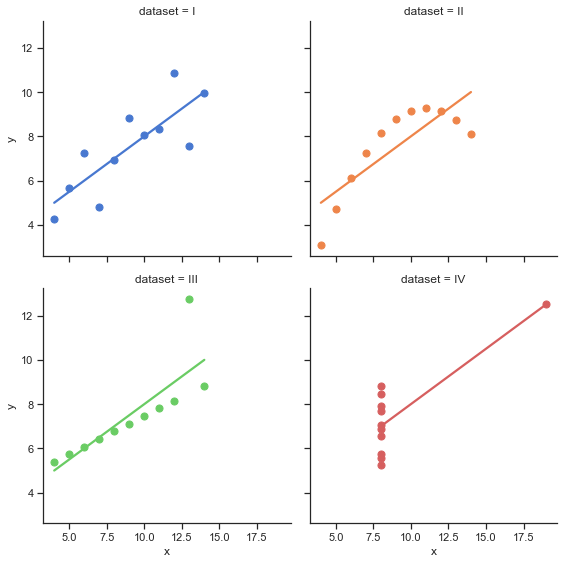

In [145]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})